In [1]:
# PROCESS THE GAIA CATALOG OF RGB Stars:
# https://ui.adsabs.harvard.edu/abs/2023ApJS..267....8A/abstract
# https://zenodo.org/records/7945154
#
#
# ZACK REEVES
# CREATED: 2024
#
# VERSIONS:
#  1.1  JUN 2024 CREATE JUPYTER NOTEBOOK

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import collections

import astropy.units as u
import astropy.coordinates
from astropy.table import Table, join, vstack
from astropy.io import ascii

from astroquery.gaia import Gaia

sys.path.insert(0, '..')
from common import file_functions, calculations, gaia_functions

from matplotlib import pyplot as plt, colors

In [3]:
# Define the metadata for the data set.  NEED TO EDIT
#https://ui.adsabs.harvard.edu/abs/2023A%26A...674A..39G/abstract
metadata = {}

metadata['project'] = 'Digital Universe Atlas Gaia Subsets'
metadata['sub_project'] = 'Red Giant Branch Stars'

metadata['catalog'] = 'Robust Data-driven Metallicities for 175 Million Stars from Gaia XP Spectra (Andrae, 2023)'
metadata['catalog_author'] = 'Andrae+'
metadata['catalog_year'] = '2023'
metadata['catalog_doi'] = 'doi:10.3847/1538-4365/acd53e'
metadata['catalog_bibcode'] = '2023ApJS..267....8A'

metadata['prepared_by'] = 'Brian Abbott, Zack Reeves'
metadata['version'] = '1.1'

metadata['dir'] = metadata['sub_project'].replace(' ', '_').lower()
metadata['raw_data_dir'] = ''

metadata['data_group_title'] = 'Giants'
metadata['data_group_desc'] = 'Red Giant Branch Stars' #need to fix
metadata['data_group_desc_long'] = 'The Sun is the reference point in much of stellar astronomy and astrophysics. Solar analogues are stars that resemble the Sun in terms of a restricted set of parameters. In contrast to the Sun, they can be observed in the night sky and with the very same instruments used to study stars in the Milky Way.'
metadata['fileroot'] = 'giant'

file_functions.generate_license_file(metadata)
file_functions.generate_asset_file(metadata)

In [4]:
data = Table.read('raw_data/table_2_catwise.fits.gz')
data

<Table length=17558141>
     source_id              l          ... logg_xgboost in_training_sample
       int64             float64       ...   float64           bool       
------------------- ------------------ ... ------------ ------------------
     15741055975040 176.73918412075122 ...        2.993               True
     25980257976960 176.36933617383926 ...        3.446               True
     66627828480768 176.48356548094657 ...        1.916              False
     82467667849472  176.2093011960656 ...        3.203               True
    101193725229056 175.75517408467232 ...        3.319              False
    130399502833792  175.7897591660523 ...        2.398               True
    134999412195456 175.95594661610122 ...        3.363               True
    135446088793984 175.88288960834686 ...        2.569               True
    141566417699200 176.99418338336451 ...        2.573               True
    145582211474560 176.83433279242504 ...        2.566               True
                ...                ... ...          ...                ...
6917515734718201472  48.64260679562668 ...        3.427              False
6917517315266208896 48.441792367527285 ...         2.63              False
6917518002460972672  48.54463212991618 ...        2.196              False
6917518891518754432 48.619154955939074 ...        1.825              False
6917522293132852224  48.74854336820524 ...        2.734               True
6917522464931567744 48.777837266955785 ...         3.48              False
6917522778464669696  48.76431828776882 ...        2.978              False
6917523083406587264  48.83569247550931 ...        2.448              False
6917523495723447552 48.879484618673104 ...        3.281               True
6917527142151450112  48.80748274524439 ...        2.744              False

In [5]:
data['parallax'].unit=u.mas
calculations.get_distance(data, parallax='parallax')

In [6]:
data['ra'].unit=u.deg
data['dec'].unit=u.deg
data['pmra'].unit=u.mas/u.yr
data['pmdec'].unit=u.mas/u.yr
data['radial_velocity'].unit=u.km/u.s
calculations.get_cartesian(data)

In [7]:
data['phot_g_mean_mag'].unit=u.mag
data['phot_bp_mean_mag'].unit=u.mag
data['phot_rp_mean_mag'].unit=u.mag

In [11]:
gaia_functions.get_magnitudes(data)
gaia_functions.get_luminosity(data)
data['bp_rp'] = [data['phot_bp_mean_mag'][i]-data['phot_rp_mean_mag'][i] for i in range(len(data))]
gaia_functions.get_bp_g_color(data, color='bp_rp')

In [12]:
data

<Table length=17558141>
     source_id              l          ...       bp_rp         color 
                                       ...                     solLum
       int64             float64       ...      float64       float64
------------------- ------------------ ... ------------------ -------
     15741055975040 176.73918412075122 ... 1.1544876588353272    1.15
     25980257976960 176.36933617383926 ... 1.1144603359246954    1.11
     66627828480768 176.48356548094657 ... 1.4092439722342966    1.41
     82467667849472  176.2093011960656 ... 1.1890161168812323    1.19
    101193725229056 175.75517408467232 ... 1.1310250180011288    1.13
    130399502833792  175.7897591660523 ... 1.3284399745975595    1.33
    134999412195456 175.95594661610122 ... 1.0519129341566682    1.05
    135446088793984 175.88288960834686 ... 1.1711720973613176    1.17
    141566417699200 176.99418338336451 ... 1.3360651049290109    1.34
                ...                ... ...                ...     ...
6917515734718201472  48.64260679562668 ...  1.220035486596089    1.22
6917517315266208896 48.441792367527285 ...  1.109214288639997    1.11
6917518002460972672  48.54463212991618 ... 1.4340207542363235    1.43
6917518891518754432 48.619154955939074 ... 1.2166126858180029    1.22
6917522293132852224  48.74854336820524 ...  1.322003185491285    1.32
6917522464931567744 48.777837266955785 ... 1.1340188582567396    1.13
6917522778464669696  48.76431828776882 ... 1.2262279444784632    1.23
6917523083406587264  48.83569247550931 ... 1.1447935660988655    1.14
6917523495723447552 48.879484618673104 ... 1.2070695760146215    1.21
6917527142151450112  48.80748274524439 ... 1.0504645206926462    1.05

(array([1.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00, 8.00000e+00,
        5.00000e+00, 7.00000e+00, 6.00000e+00, 8.00000e+00, 7.00000e+00,
        3.00000e+00, 6.00000e+00, 5.00000e+00, 1.00000e+00, 5.00000e+00,
        5.00000e+00, 8.00000e+00, 1.20000e+01, 1.80000e+01, 1.80000e+01,
        2.30000e+01, 6.40000e+01, 6.20000e+01, 1.37000e+02, 5.39000e+02,
        2.22400e+03, 6.70600e+03, 1.62590e+04, 4.02480e+04, 8.38120e+04,
        1.42229e+05, 2.11183e+05, 2.84650e+05, 3.51697e+05, 4.11692e+05,
        4.58348e+05, 4.89408e+05, 5.07294e+05, 5.14531e+05, 5.16630e+05,
        5.12428e+05, 5.09131e+05, 5.03862e+05, 4.98399e+05, 4.91998e+05,
        4.84085e+05, 4.75430e+05, 4.63353e+05, 4.51143e+05, 4.36957e+05,
        4.21180e+05, 4.05621e+05, 3.85822e+05, 3.68907e+05, 3.50848e+05,
        3.35314e+05, 3.19971e+05, 3.04411e+05, 2.89826e+05, 2.75862e+05,
        2.62228e+05, 2.49914e+05, 2.37962e+05, 2.26

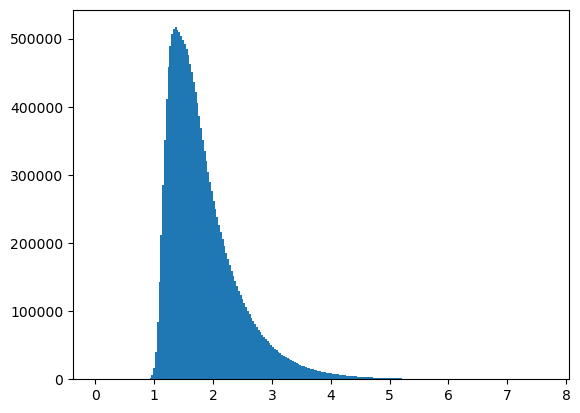

In [13]:
plt.hist(data['bp_rp'], bins=250)

<function matplotlib.pyplot.show(close=None, block=None)>

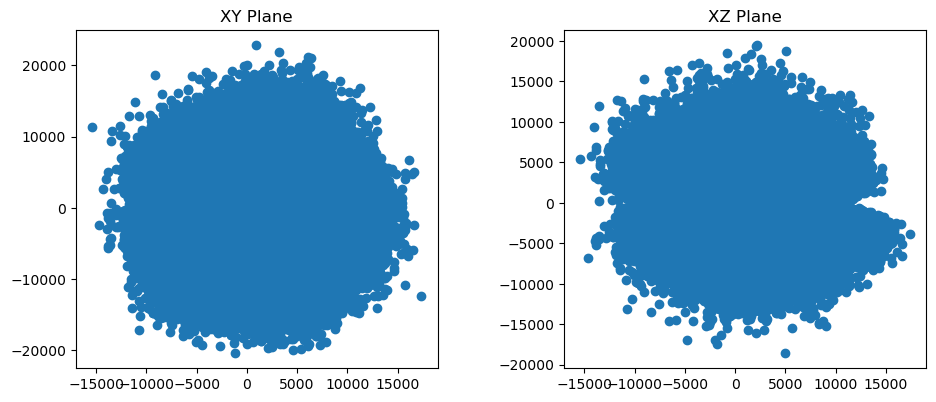

In [15]:
#2D Visualization
fig, ax = plt.subplots(1, 2)

#XY Plane
ax[0].scatter(data['x'], data['y'])
ax[0].set_title('XY Plane')

#XZ Plane
ax[1].scatter(data['x'], data['z'])
ax[1].set_title('XZ Plane')

#set good spacing
fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
plt.show

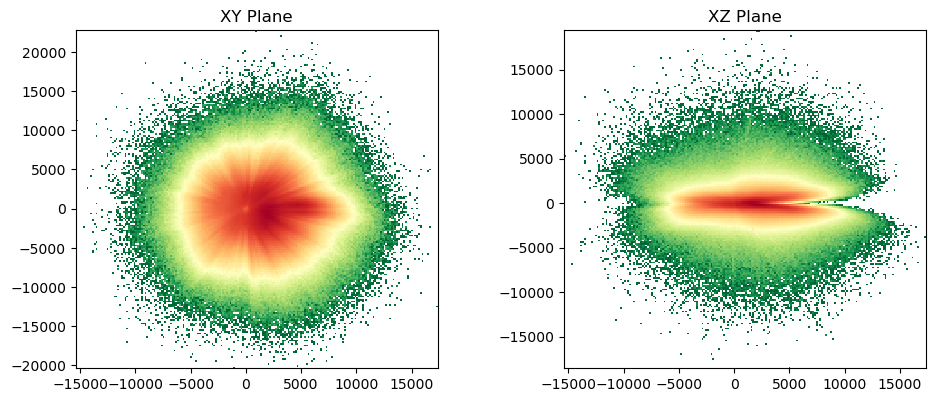

In [16]:
#2D Density Visualization
fig, ax = plt.subplots(1, 2)

#XY Plane
ax[0].hist2d(data['x'], data['y'], 
           bins = 200,  
           norm = colors.LogNorm(),  
           cmap = "RdYlGn_r",) 
ax[0].set_title('XY Plane')

#XZ Plane
ax[1].hist2d(data['x'], data['z'], 
           bins = 200,  
           norm = colors.LogNorm(),  
           cmap = "RdYlGn_r",) 
ax[1].set_title('XZ Plane')

#set good spacing
fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
#plt.show

In [17]:
#construct a speck comment column
data['speck_label'] = data.Column(data=['#__'+str(name) for name in data['source_id']], 
                                  meta=collections.OrderedDict([('ucd', 'meta.id')]),
                                  description='Gaia EDR3 Source ID')

#construct a label column
data['label'] = ['GaiaEDR3_'+ str(source) for source in data['source_id']]  #leaving for now in case we want to add other labels

In [19]:
#setting metadata for dcalc
data['dcalc'] = data.Column([3]*len(data),
                            meta=collections.OrderedDict([('ucd', 'meta.dcalc')]),
                            description='Distance Indicator: 1 indicates a Bailer-Jones photogeometric distance; 2 indicates a Bailer-Jones geometric distance; 3 indicates a Gaia parallax-based distance')


In [20]:
#setting texture number column
data['texnum'] = data.Column(data=[1]*len(data), 
                                  meta=collections.OrderedDict([('ucd', 'meta.texnum')]),
                                  description='Texture Number')

In [21]:
#Getting the column metadata
columns = file_functions.get_metadata(data, columns=['x', 'y', 'z', 'color', 'lum', 'absmag', 'appmag', 'texnum', 'dist_ly', 'dcalc', 'u', 'v', 'w', 'speed', 'speck_label'])
columns

name    unit datatype width precision arraysize  \
0             x      pc  float64               6             
1             y      pc  float64               6             
2             z      pc  float64               6             
3         color  solLum  float64               2             
4           lum  solLum  float64               6             
5        absmag     mag  float64               6             
6        appmag     mag      >f8               6             
7        texnum            int32                             
8       dist_ly     lyr  float64               1             
9         dcalc            int32                             
10            u  km / s  float64               6             
11            v  km / s  float64               6             
12            w  km / s  float64               6             
13        speed          float64               6             
14  speck_label              str                         *   

                     ucd                                        description  
0        pos.cartesian.x  x position (galactic cartesian coordinates) in...  
1        pos.cartesian.y                 Position (y coordinate) in parsecs  
2        pos.cartesian.z                 Position (z coordinate) in parsecs  
3             phys.color                                    Gaia BP-G color  
4        phys.luminosity                                 Stellar Luminosity  
5   phot.magAbs;em.opt.G                  Absolute magnitude in Gaia G-band  
6      phot.mag;em.opt.G                  Apparent magnitude in Gaia G-band  
7            meta.texnum                                     Texture Number  
8           pos.distance                            Distance from Sun (lyr)  
9             meta.dcalc  Distance Indicator: 1 indicates a Bailer-Jones...  
10       vel.cartesian.u      Heliocentric velocity towards Galactic Center  
11       vel.cartesian.v    Heliocentric velocity towards Galactic Rotation  
12       vel.cartesian.w  Heliocentric velocity towards Galactic North Pole  
13             vel.speed                        Total heliocentric velocity  
14               meta.id                                Gaia EDR3 Source ID

In [24]:
# Print the csv file using the to_csv function in file_functions
file_functions.to_csv(metadata, Table.to_pandas(data), columns)

In [22]:
# Print the speck file using the to_speck function in file_functions
file_functions.to_speck(metadata, Table.to_pandas(data), columns)

In [23]:
# Print the label file using the to_label function in file_functions
file_functions.to_label(metadata, Table.to_pandas(data))

In [25]:
data

<Table length=17558141>
     source_id              l                   b          ... dcalc texnum
                                                           ...             
       int64             float64             float64       ... int32 int32 
------------------- ------------------ ------------------- ... ----- ------
     15741055975040 176.73918412075122  -48.57203534129479 ...     3      1
     25980257976960 176.36933617383926  -48.73207567210847 ...     3      1
     66627828480768 176.48356548094657    -48.171321944021 ...     3      1
     82467667849472  176.2093011960656 -48.607026319466144 ...     3      1
    101193725229056 175.75517408467232  -48.72778106900866 ...     3      1
    130399502833792  175.7897591660523  -48.32858424959875 ...     3      1
    134999412195456 175.95594661610122  -48.08681419134813 ...     3      1
    135446088793984 175.88288960834686  -48.13204747358177 ...     3      1
    141566417699200 176.99418338336451  -47.91808351926137 ...     3      1
                ...                ...                 ... ...   ...    ...
6917515734718201472  48.64260679562668 -28.319937992274014 ...     3      1
6917517315266208896 48.441792367527285 -28.133330287761137 ...     3      1
6917518002460972672  48.54463212991618 -28.155568250068622 ...     3      1
6917518891518754432 48.619154955939074 -28.256657615205985 ...     3      1
6917522293132852224  48.74854336820524  -28.34669296896872 ...     3      1
6917522464931567744 48.777837266955785 -28.451060811119117 ...     3      1
6917522778464669696  48.76431828776882  -28.40310598912417 ...     3      1
6917523083406587264  48.83569247550931 -28.452591892881323 ...     3      1
6917523495723447552 48.879484618673104 -28.434142008580647 ...     3      1
6917527142151450112  48.80748274524439  -28.30419771545421 ...     3      1